In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the red wine dataset from the file
df = pd.read_csv('/Users/alkutgalip/Downloads/red_wine.csv')

# Create the profiling report
profile = ProfileReport(df, title="Red Wine Data Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("red_wine_data_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the red wine dataset from the specified file path
df = pd.read_csv('/Users/alkutgalip/Downloads/red_wine.csv')

# Define features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']

# Create a dictionary to store the models
models = {
    'Baseline AUC': DummyClassifier(strategy="most_frequent"),
    'Baseline Accuracy': DummyClassifier(strategy="most_frequent"),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-RBF': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

# Initialize lists to store results
results = {'Model': [], 'AUC': [], 'Accuracy': []}

# Define cross-validation settings
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate each model
for model_name, model in models.items():
    if "Baseline" in model_name:
        # For baseline models, we calculate AUC based on a random classifier
        scores_auc = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
        scores_acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    else:
        # For other models, calculate AUC and accuracy
        scores_auc = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
        scores_acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy")

    # Calculate mean scores
    mean_auc = np.mean(scores_auc)
    mean_acc = np.mean(scores_acc)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['AUC'].append(mean_auc)
    results['Accuracy'].append(mean_acc)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


                 Model       AUC  Accuracy
0         Baseline AUC  0.500000  0.528887
1    Baseline Accuracy  0.500000  0.528887
2  Logistic Regression  0.875819  0.784392
3          Naive Bayes  0.893291  0.824773
4        Decision Tree  0.810785  0.805445
5           SVM-Linear  0.875446  0.793134
6              SVM-RBF  0.855024  0.535844
7        Random Forest  0.919508  0.847399


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/Users/alkutgalip/Downloads/red_wine.csv')

# Encode the target variable ('type') to numeric labels
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Select relevant features
X = data[['citric acid', 'sulphates', 'alcohol', 'type']]  # Assuming these are your features
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Save the figure as an image
plt.savefig('roc_curve.png')

# Display a message indicating the image is saved
print("ROC curve image saved as 'roc_curve.png'")


ROC curve image saved as 'roc_curve.png'


<IPython.core.display.Javascript object>


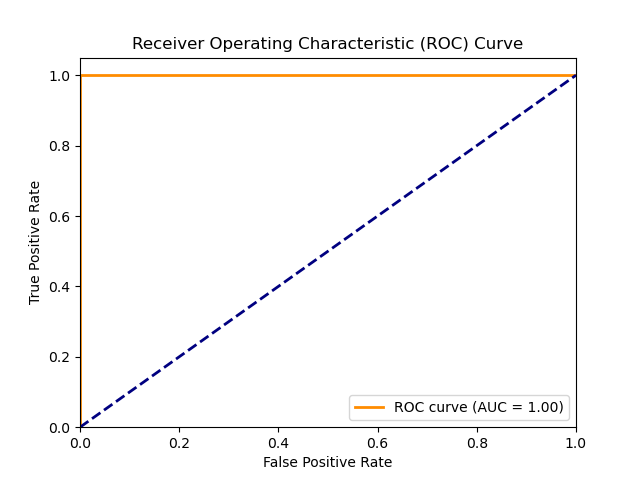

/var/folders/gj/wrpyklq54y97gzjz_l71lh700000gp/T/ipykernel_3002/3519743949.py:50: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/Users/alkutgalip/Downloads/red_wine.csv')

# Encode the target variable ('type') to numeric labels
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Select relevant features
X = data[['citric acid', 'sulphates', 'alcohol', 'type']]  # Assuming these are your features
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Enable interactive plotting
%matplotlib notebook

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with white-wine.csv)
data = pd.read_csv('/Users/alkutgalip/Downloads/white_wine.csv')

# Encode the target variable ('type') to numeric labels
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Select relevant features
X = data[['citric acid', 'sulphates', 'alcohol', 'type']]  # Assuming these are your features
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier (or use the best model from Q2)
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print the AUC score
print("AUC score on white-wine.csv:", auc_score)


AUC score on white-wine.csv: 1.0


In [ ]:
The AUC score obtained will provide insights into the performance of the model on the white wine dataset. 
A higher AUC score indicates better predictive performance.